In [1]:
from transformers import BertTokenizer
import matplotlib.pyplot as plt


bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
finbert_tokenizer = BertTokenizer.from_pretrained("TurkuNLP/bert-base-finnish-cased-v1")



In [2]:
bert_tokens = list(bert_tokenizer.get_vocab().keys())
finbert_tokens = list(finbert_tokenizer.get_vocab().keys())

In [3]:
def get_tokenizer_subword_ratio(tokenizer):
    subword_tokens = 0
    for token in tokenizer.get_vocab().keys():
        if token.startswith("##"):
            subword_tokens += 1
    return subword_tokens / len(tokenizer.get_vocab())

def get_tokenizer_alphanumeric_ratio(tokenizer):
    alphanumeric_tokens = 0
    for token in tokenizer.get_vocab().keys():
        if token.isalnum():
            alphanumeric_tokens += 1
    return alphanumeric_tokens / len(tokenizer.get_vocab())

def get_tokenizer_purely_numeric_ratio(tokenizer):
    purely_numeric_tokens = 0
    for token in tokenizer.get_vocab().keys():
        if token.isnumeric():
            purely_numeric_tokens += 1
    return purely_numeric_tokens / len(tokenizer.get_vocab())

def get_tokenizer_purely_alphabetic_ratio(tokenizer):
    purely_alphabetic_tokens = 0
    for token in tokenizer.get_vocab().keys():
        if token.isalpha():
            purely_alphabetic_tokens += 1
    return purely_alphabetic_tokens / len(tokenizer.get_vocab())

def get_tokenizer_special_character_ratio(tokenizer):
    special_character_tokens = 0
    for token in tokenizer.get_vocab().keys():
        if not token.isalnum():
            special_character_tokens += 1
    return special_character_tokens / len(tokenizer.get_vocab())

def get_tokenizer_summary(tokenizer):
    return {
        "subword_ratio": get_tokenizer_subword_ratio(tokenizer),
        "alphanumeric_ratio": get_tokenizer_alphanumeric_ratio(tokenizer),
        "purely_numeric_ratio": get_tokenizer_purely_numeric_ratio(tokenizer),
        "purely_alphabetic_ratio": get_tokenizer_purely_alphabetic_ratio(tokenizer),
        "special_character_ratio": get_tokenizer_special_character_ratio(tokenizer)
    }

def pretty_print_summary(tokenizer):
    summary = get_tokenizer_summary(tokenizer)
    print(f"\tSubword ratio: {summary['subword_ratio']:.1%}")
    print(f"\tAlphanumeric ratio: {summary['alphanumeric_ratio']:.1%}")
    print(f"\tPurely numeric ratio: {summary['purely_numeric_ratio']:.1%}")
    print(f"\tPurely alphabetic ratio: {summary['purely_alphabetic_ratio']:.1%}")
    print(f"\tSpecial character ratio: {summary['special_character_ratio']:.1%}")
    print()

def compare_two_tokenizers_graphically(tokenizer1, tokenizer2):
    summary1 = get_tokenizer_summary(tokenizer1)
    summary2 = get_tokenizer_summary(tokenizer2)
    

    labels = list(summary1.keys())
    bert_values = list(summary1.values())
    finbert_values = list(summary2.values())

    x = range(len(labels))

    fig, ax = plt.subplots()
    ax.bar(x, bert_values, width=0.4, label="BERT")
    ax.bar([i + 0.4 for i in x], finbert_values, width=0.4, label="FinBERT")

    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()
    plt.show()


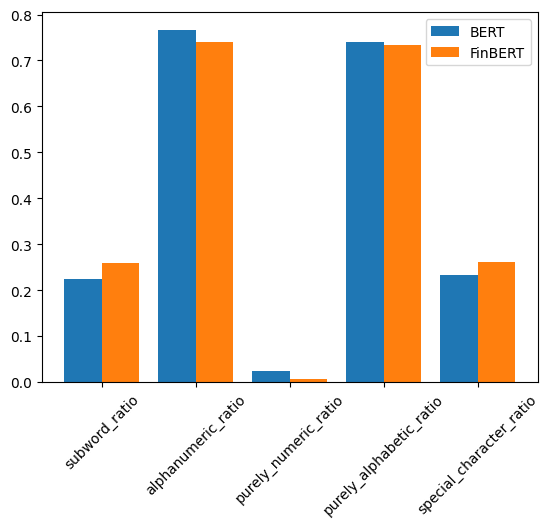

BERT:
	Subword ratio: 22.3%
	Alphanumeric ratio: 76.6%
	Purely numeric ratio: 2.4%
	Purely alphabetic ratio: 74.0%
	Special character ratio: 23.4%

FinBERT:
	Subword ratio: 25.8%
	Alphanumeric ratio: 73.9%
	Purely numeric ratio: 0.6%
	Purely alphabetic ratio: 73.3%
	Special character ratio: 26.1%



In [6]:
compare_two_tokenizers_graphically(bert_tokenizer, finbert_tokenizer)

print("BERT:")
pretty_print_summary(bert_tokenizer)

print("FinBERT:")
pretty_print_summary(finbert_tokenizer)